Let's take a look at the outputevents table. <br>
First we import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [3]:
outputevents_df = pd.read_csv('../Extracted CSVs/OUTPUTEVENTS.csv')

In [4]:
items_dict = pd.read_csv('../Extracted CSVs/D_ITEMS.csv')

Getting a feel of the data.

In [5]:
items_dict.head()

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
0,457,497,Patient controlled analgesia (PCA) [Inject],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
1,458,498,PCA Lockout (Min),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
2,459,499,PCA Medication,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
3,460,500,PCA Total Dose,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
4,461,501,PCV Exh Vt (Obser),NaN,carevue,chartevents,NaN,NaN,NaN,NaN


In [6]:
outputevents_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,STOPPED,NEWBOTTLE,ISERROR
0,344,21219,177991.0,225765.0,2142-09-08 10:00:00,40055,200.0,ml,2142-09-08 12:08:00,17269,NaN,NaN,NaN
1,345,21219,177991.0,225765.0,2142-09-08 12:00:00,40055,200.0,ml,2142-09-08 12:08:00,17269,NaN,NaN,NaN
2,346,21219,177991.0,225765.0,2142-09-08 13:00:00,40055,120.0,ml,2142-09-08 13:39:00,17269,NaN,NaN,NaN
3,347,21219,177991.0,225765.0,2142-09-08 14:00:00,40055,100.0,ml,2142-09-08 16:17:00,17269,NaN,NaN,NaN
4,348,21219,177991.0,225765.0,2142-09-08 16:00:00,40055,200.0,ml,2142-09-08 16:17:00,17269,NaN,NaN,NaN


In [7]:
outputevents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349218 entries, 0 to 4349217
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ROW_ID      int64  
 1   SUBJECT_ID  int64  
 2   HADM_ID     float64
 3   ICUSTAY_ID  float64
 4   CHARTTIME   object 
 5   ITEMID      int64  
 6   VALUE       float64
 7   VALUEUOM    object 
 8   STORETIME   object 
 9   CGID        int64  
 10  STOPPED     float64
 11  NEWBOTTLE   float64
 12  ISERROR     float64
dtypes: float64(6), int64(4), object(3)
memory usage: 431.4+ MB


In [8]:
items_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12487 entries, 0 to 12486
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ROW_ID        12487 non-null  int64  
 1   ITEMID        12487 non-null  int64  
 2   LABEL         12483 non-null  object 
 3   ABBREVIATION  2992 non-null   object 
 4   DBSOURCE      12487 non-null  object 
 5   LINKSTO       12487 non-null  object 
 6   CATEGORY      6049 non-null   object 
 7   UNITNAME      1234 non-null   object 
 8   PARAM_TYPE    2992 non-null   object 
 9   CONCEPTID     0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 975.7+ KB


In [9]:
merged_op = pd.merge(outputevents_df, items_dict, on='ITEMID' )
merged_op.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,...,ISERROR,ROW_ID_y,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
0,344,21219,177991.0,225765.0,2142-09-08 10:00:00,40055,200.0,ml,2142-09-08 12:08:00,17269,...,NaN,10580,Urine Out Foley,NaN,carevue,outputevents,NaN,NaN,NaN,NaN
1,345,21219,177991.0,225765.0,2142-09-08 12:00:00,40055,200.0,ml,2142-09-08 12:08:00,17269,...,NaN,10580,Urine Out Foley,NaN,carevue,outputevents,NaN,NaN,NaN,NaN
2,346,21219,177991.0,225765.0,2142-09-08 13:00:00,40055,120.0,ml,2142-09-08 13:39:00,17269,...,NaN,10580,Urine Out Foley,NaN,carevue,outputevents,NaN,NaN,NaN,NaN
3,347,21219,177991.0,225765.0,2142-09-08 14:00:00,40055,100.0,ml,2142-09-08 16:17:00,17269,...,NaN,10580,Urine Out Foley,NaN,carevue,outputevents,NaN,NaN,NaN,NaN
4,348,21219,177991.0,225765.0,2142-09-08 16:00:00,40055,200.0,ml,2142-09-08 16:17:00,17269,...,NaN,10580,Urine Out Foley,NaN,carevue,outputevents,NaN,NaN,NaN,NaN


In [10]:
merged_op['LABEL'].unique()

array(['Urine Out Foley', 'Urine Out Void', 'Drain Out #1 Pericardial',
       ..., 'Sump #2', 'R Ureteral Stent', 'Davol'], dtype=object)

These are the unique labels that were assigned to the outputs.

In [11]:
merged_op['LABEL'].value_counts()

Urine Out Foley           1917421
Foley                     1186717
Chest Tubes CTICU CT 1     152716
Urine .                    108982
Stool Out Stool             81828
                           ...   
Cecostomy                       1
L. Pleural Tap                  1
urine out:cc/k/hr               1
gastric asp                     1
Cath Lab Out                    1
Name: LABEL, Length: 1153, dtype: int64

The next visualisation gives us information about the top 10 most common output labels.

<AxesSubplot:>

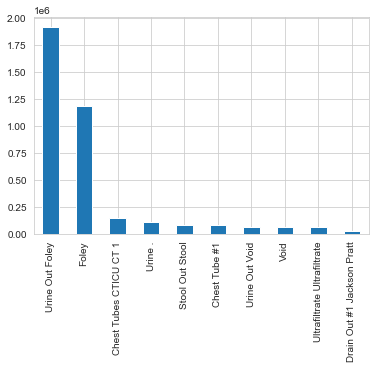

In [12]:
merged_op['LABEL'].value_counts().head(10).plot(kind='bar')

In the next few code cells, we learn more about the category these outputs belong to.

In [13]:
merged_op['CATEGORY'].value_counts()

Output              1470124
Drains                93454
Free Form Intake       3603
Name: CATEGORY, dtype: int64

([<matplotlib.patches.Wedge at 0x1b99e2c6d30>,
 [Text(-1.0792457255280077, 0.21267031746232148, 'Output'),
  Text(1.0776815456454365, -0.22045971553837948, 'Drains'),
  Text(1.099971308259743, -0.007944872896998112, 'Free From Intake')])

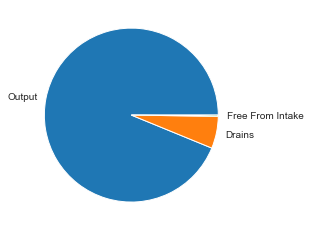

In [14]:
plt.pie(merged_op['CATEGORY'].value_counts(), labels = 'Output;Drains;Free From Intake'.split(';'))